### bar graph for one state

In [1]:
def one_city_data_graph(state_data,date) :
    x,y = [],[]
    for i,j in state_data.items():
        x.append(i)
        y.append(j)
    x.pop(0)
    state = y.pop(0)
    
    plt.figure(figsize=(12,6))
    plt.bar(x,y,color='skyblue',width=0.5)
    for i, value in enumerate(y):
        plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.title(f"{state} state cases for date {date}")
    plt.tight_layout()
    plt.show()

### bar graph for two state

In [2]:
def two_city_data_graph(state1_data,state2_data,date) :
    x1,y1 = [],[]
    for i,j in state1_data.items():
        x1.append(i)
        y1.append(j)
    x1.pop(0)
    state1 = y1.pop(0)

    y2 = []
    for i in state2_data.values():
        y2.append(i)
    state2 = y2.pop(0)

    fig, ax = plt.subplots(figsize=(12, 6))
    width = 0.3

    bars1 = ax.bar(np.arange(len(x1)) - width/2, y1, width, label=state1, color='skyblue')
    bars2 = ax.bar(np.arange(len(x1)) + width/2, y2, width, label=state2, color='orange')

    for i, bar in enumerate(bars1):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, str(y1[i]), ha='center', va='bottom')

    for i, bar in enumerate(bars2):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, str(y2[i]), ha='center', va='bottom')

    ax.set_xticks(np.arange(len(x1)))
    ax.set_xticklabels(x1)
    ax.set_title(f"{state1} and {state2} cases for date {date}")
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax.legend()
    plt.tight_layout()
    plt.show()

### pie chart for search history

In [3]:
def pie_chart(history_data):
    labels = []
    values = []

    for i,j in history_data.items() :
        labels.append(i)
        values.append(j)

    plt.figure(figsize=(8, 6))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True ,wedgeprops={'edgecolor': 'black'})

    plt.legend()
    plt.show()

### method for return covid data

In [4]:
def data(state, date) :
    url = "https://api.rootnet.in/covid19-in/stats/history"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        
        for entry in data['data'] :
            if entry['day'] == date :
                for state_data in entry['regional'] :
                    if state_data['loc'] == state :
                        return state_data
    else:
        print("Please enter valid state or date")

In [5]:
def choices(first_name, last_name) :
    choice = 0
    while(choice != 3) :
        print("1 for one city data")
        print("2 for two city comperation")
        print("3 for exit")
        choice = int(input("Enter your choice : "))
    
        if(choice == 1):
            date = input("Enter date(YYYY-MM-DD) : ")
            state = input("Enter state name : ") 
            cursor.execute("INSERT INTO history (user_first_name,user_last_name,searched_city_name) VALUES (%s, %s, %s)", (first_name,last_name,state))
            connection.commit()
            state_data = data(state, date)
            one_city_data_graph(state_data,date)
            
        elif(choice == 2):
            date = input("Enter date(YYYY-MM-DD) : ")
            state1 = input("Enter state 1 name : ") 
            state2 = input("Enter state 2 name : ")
            cursor.execute("INSERT INTO history (user_first_name,user_last_name,searched_city_name) VALUES (%s, %s, %s)", (first_name,last_name,state1))
            cursor.execute("INSERT INTO history (user_first_name,user_last_name,searched_city_name) VALUES (%s, %s, %s)", (first_name,last_name,state2))
            connection.commit()
            state1_data = data(state1,date)
            state2_data = data(state2,date)
            two_city_data_graph(state1_data,state2_data,date)
            
        elif(choice == 3):
            pass
            
        else:
            print("please enter valid number")

1 for admin
2 for user
3 for exit


Enter your choice :  2


1 for Register
2 for Login


Enter your choice :  2


Your phone number :  6351587715



1 for one city data
2 for two city comperation
3 for exit


Enter your choice :  1
Enter date(YYYY-MM-DD) :  2021-04-21
Enter state name :  Maharashtra


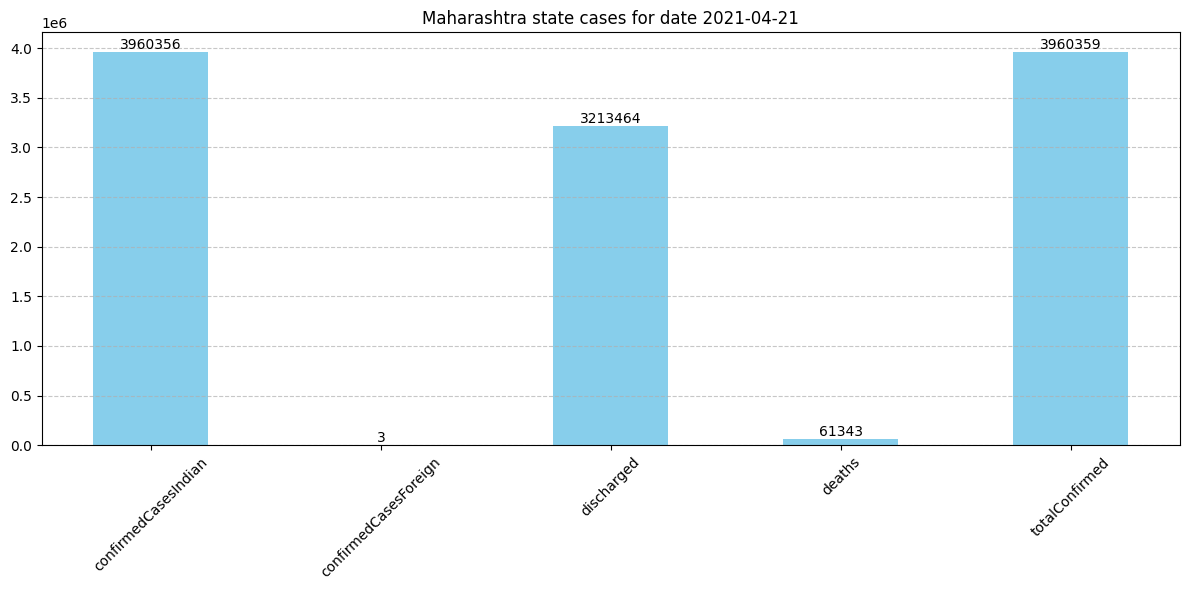

1 for one city data
2 for two city comperation
3 for exit


Enter your choice :  2
Enter date(YYYY-MM-DD) :  2021-04-21
Enter state 1 name :  Gujarat
Enter state 2 name :  Punjab


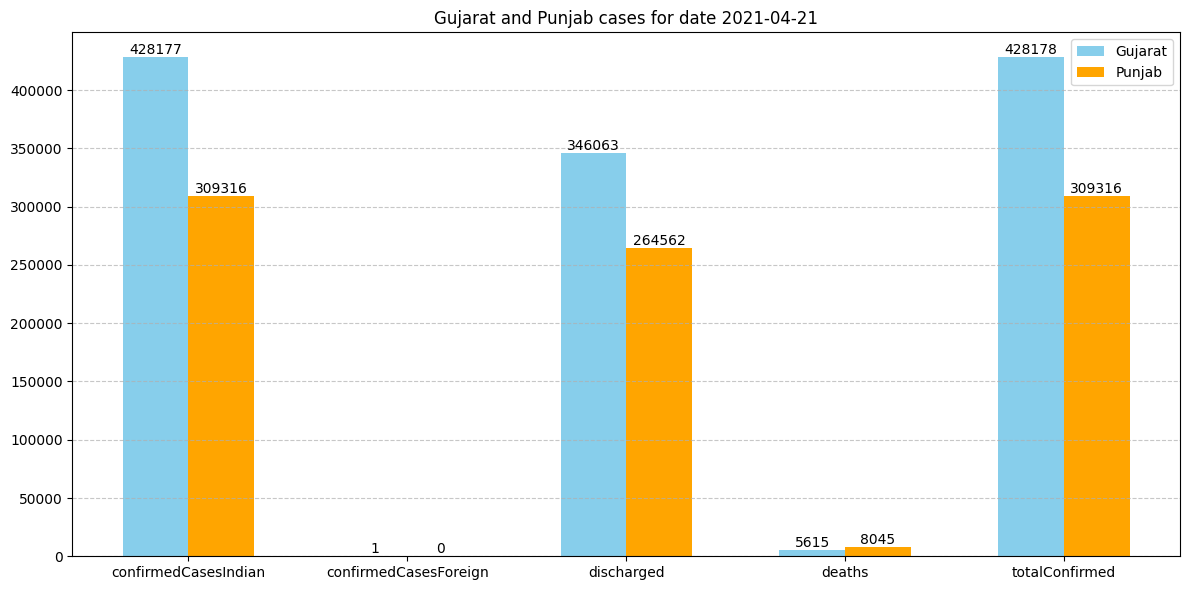

1 for one city data
2 for two city comperation
3 for exit


Enter your choice :  3


1 for admin
2 for user
3 for exit


Enter your choice :  1
Enter name :  het thummar
Enter password :  h2476


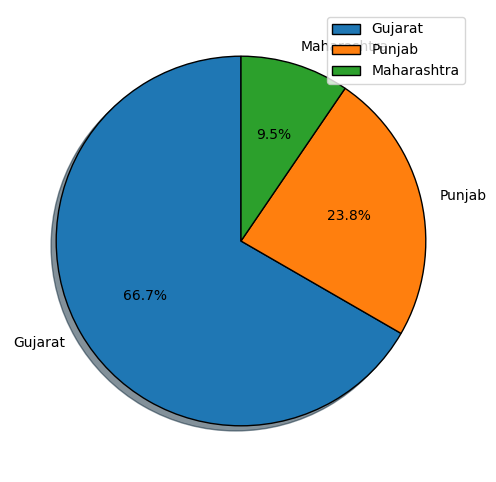

1 for admin
2 for user
3 for exit


Enter your choice :  3



Thank you


In [11]:
import mysql.connector
import requests
import json
import matplotlib.pyplot as plt
import numpy as np

# Connect to the MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="covid19"
)
cursor = connection.cursor()

# create tadmin able if not exist
cursor.execute("""
    CREATE TABLE IF NOT EXISTS admin (
        id INT AUTO_INCREMENT PRIMARY KEY,
        name VARCHAR(255) NOT NULL,
        password VARCHAR(10) NOT NULL
    )
""")

# create user able if not exist
cursor.execute("""
    CREATE TABLE IF NOT EXISTS user (
        id INT AUTO_INCREMENT PRIMARY KEY,
        first_name VARCHAR(25) NOT NULL,
        last_name VARCHAR(25) NOT NULL,
        phone_number VARCHAR(10) NOT NULL
    )
""")

# create history able if not exist
cursor.execute("""
    CREATE TABLE IF NOT EXISTS history (
        id INT AUTO_INCREMENT PRIMARY KEY,
        user_first_name VARCHAR(25) NOT NULL,
        user_last_name VARCHAR(25) NOT NULL,
        searched_city_name VARCHAR(25) NOT NULL
    )
""")

choice = 0
while(choice!=3) :
    print("1 for admin")
    print("2 for user")
    print("3 for exit")
    choice = int(input("Enter your choice : "))

    if(choice==1):
        name = input("Enter name : ")
        password = input("Enter password : ")

        cursor.execute("SELECT * FROM admin")
        for row in cursor.fetchall():
            if(row[1]==name and row[2]==password) :
                cursor.execute("SELECT * FROM history")
                history_data = {}
                for row in cursor.fetchall():
                    if(row[3] in history_data) :
                        history_data[row[3]] += 1
                    else :
                        history_data[row[3]] = 1

                pie_chart(history_data)
                break
    
    elif(choice==2):
        print("1 for Register")
        print("2 for Login")
        c = int(input("Enter your choice : "))
        print()

        if(c==1):
            first_name = input("Your first name : ")
            last_name = input("Your last name : ")
            phone_number = input("Your phone number : ")
            cursor.execute("INSERT INTO user (first_name,last_name,phone_number) VALUES (%s, %s, %s)", (first_name,last_name,phone_number))
            connection.commit()
            print()
            choices(first_name,last_name)

        elif(c==2):
            phone_number = input("Your phone number : ")
            cursor.execute("SELECT * FROM user")
            for row in cursor.fetchall():
                if(row[3]==phone_number) :
                    print()
                    choices(row[1],row[2])
                    break
            
            
    elif(choice==3):
        print()
        print("Thank you")

    else :
        print("Please enter valid number")

cursor.close()
connection.close()